# Stats and summaries

This is a helper notebook for custom visualisation of stats exported from wandb.

In [1]:
# import wandb

# # api = wandb.Api(api_key="your_api_key")
# wandb.login()
# artifact = api.artifact("entity/project/artifact:alias")
# artifact.download()

In [2]:
from pathlib import Path

Path("figures").mkdir(exist_ok=True)

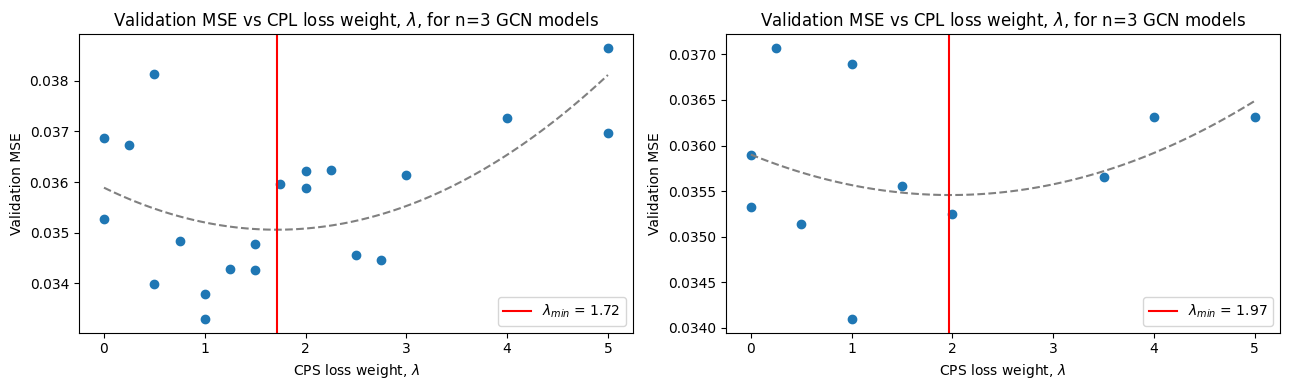

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_cps_loss_weight_fit(ax: plt.Axes, wandb_file: Path, num_models: int) -> None:
    data = pd.read_csv(wandb_file, quotechar="\"").to_numpy()
    cps_loss_weight = np.array(data[:, 1], dtype=float)
    val_mse = np.array(data[:, 2], dtype=float)

    coeffs = np.polyfit(cps_loss_weight, val_mse, deg=2)
    poly = np.poly1d(coeffs)
    x_smooth = np.linspace(min(cps_loss_weight), max(cps_loss_weight), 100)
    y_smooth = poly(x_smooth)

    ax.scatter(cps_loss_weight, val_mse)
    ax.plot(x_smooth, y_smooth, c="gray", linestyle="--")
    min_lambda = x_smooth[y_smooth.argmin()]
    ax.axvline(min_lambda, c="red", label=fr"$\lambda_{{min}}$ = {min_lambda:.2f}")
    ax.set_title(rf"Validation MSE vs CPL loss weight, $\lambda$, for n={num_models} GCN models")
    ax.set_xlabel(r"CPS loss weight, $\lambda$")
    ax.set_ylabel("Validation MSE")
    ax.legend(loc="lower right")

fig, ax = plt.subplots(1, 2, figsize=(13, 4), layout="tight")
plot_cps_loss_weight_fit(ax[0], "stats/wandb_gcn_n-cps_2_500e.csv", num_models=3)
plot_cps_loss_weight_fit(ax[1], "stats/wandb_gcn_n-cps_3_500e.csv", num_models=3)

plt.savefig("figures/val_mse_vs_cps_loss_weight_gcn_ncps_num_models_3_2.png")